In [1]:
import pandas as pd
import scipy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import DataImport
import ProcessTrips

trips = ProcessTrips.transformTrips(DataImport.trips)
zones = DataImport.zones

Original number of rows: 6122322
Number of rows after removing outliers: 6122322


In [2]:
pd.options.display.float_format = '{:.2f}'.format
print(trips.describe())  

        VendorID           tpep_pickup_datetime  \
count 6122322.00                        6122322   
mean        1.60  2019-01-17 03:13:48.876795136   
min         1.00            2019-01-01 00:00:03   
25%         1.00  2019-01-09 19:03:31.249999872   
50%         2.00     2019-01-16 23:28:52.500000   
75%         2.00            2019-01-24 19:44:38   
max         4.00            2019-01-31 23:59:41   
std         0.55                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        6122322       6122322.00     6122322.00   
mean   2019-01-17 03:27:12.691109632             1.23           1.68   
min              2019-01-01 00:01:33             0.00           0.00   
25%              2019-01-09 19:15:52             1.00           0.87   
50%              2019-01-16 23:42:18             1.00           1.38   
75%              2019-01-24 19:57:18             1.00           2.20   
max              2019-01-31 23:59:59

In [3]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6122322 entries, 0 to 7667786
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_date            date

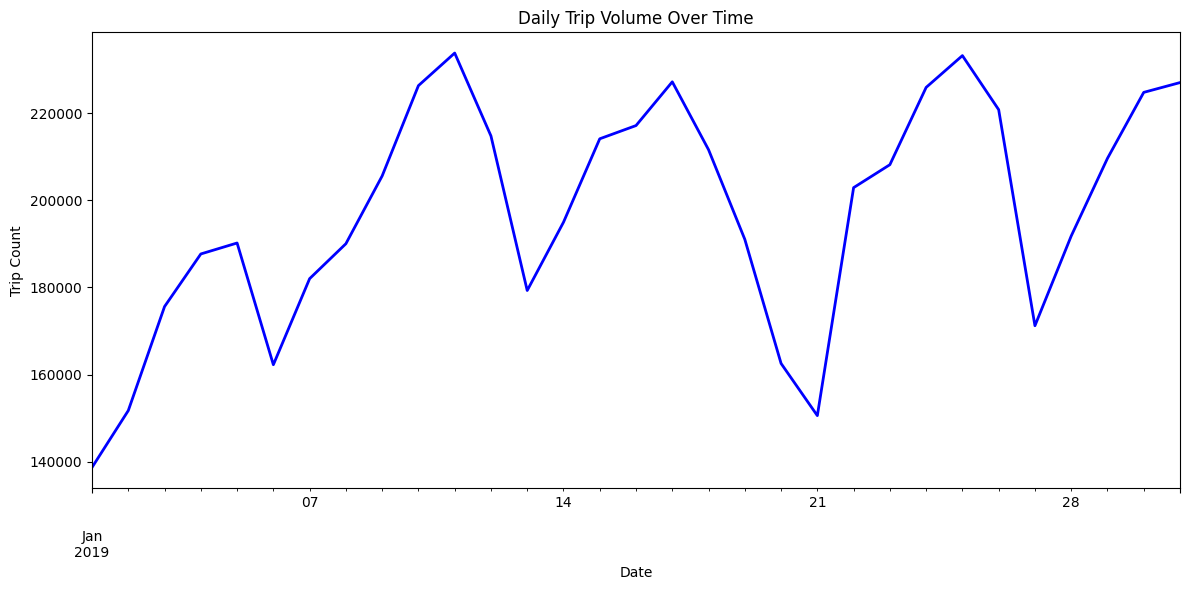

In [4]:
#Plot the line chart - daily trip volume over time 

# Count trips per day
daily_trip_counts = trips.groupby('pickup_date').size()

# Plot the line chart using pandas
daily_trip_counts.plot(
    figsize=(12, 6), 
    color='blue', 
    linewidth=2, 
    title='Daily Trip Volume Over Time'
)
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()


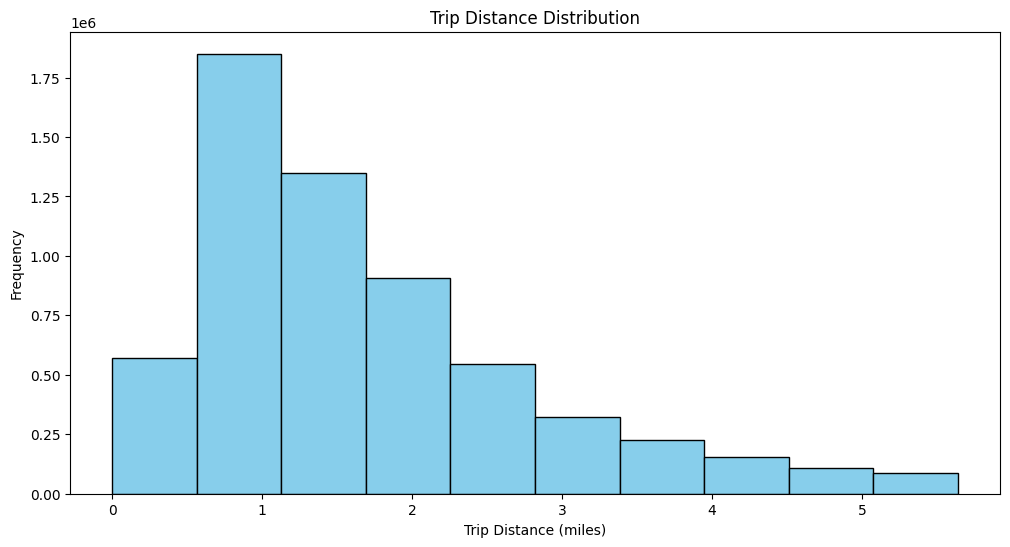

In [5]:
# Plot the histogram - trip distance distribution

trips['trip_distance'].plot(
    kind='hist', 
    #bins=20, # gali tekti pakoreguoti kai atsiras daugiau duomenu
    color='skyblue', 
    edgecolor='black', 
    figsize=(12, 6), 
    title='Trip Distance Distribution'
)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()


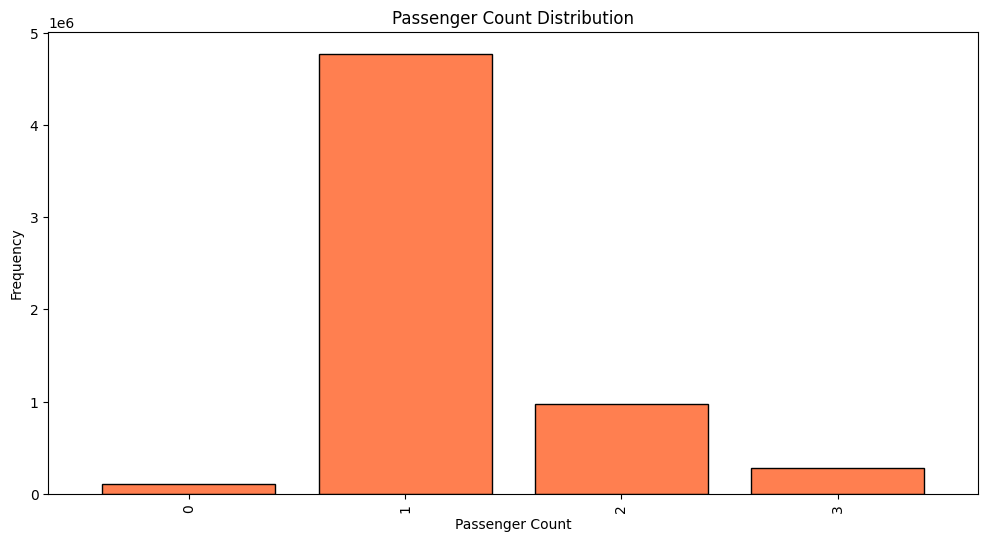

In [6]:
# Plot the passenger count distribution
trips['passenger_count'].value_counts().sort_index().plot(
    kind='bar', 
    color='coral', 
    edgecolor='black', 
    width=0.8,
    figsize=(12, 6), 
    title='Passenger Count Distribution'
)
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()


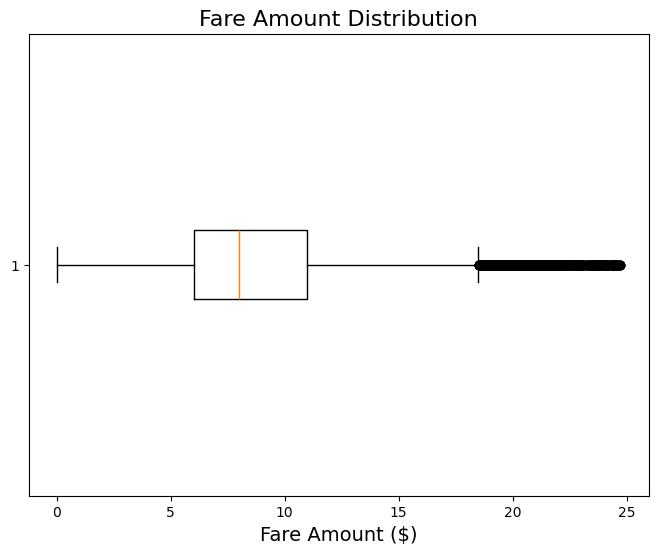

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(trips['fare_amount'], vert=False)
plt.title('Fare Amount Distribution', fontsize=16)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.show()

In [ ]:
TripsWithZones = ProcessTrips.MergeZones(trips, zones)
print(TripsWithZones)

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
